In [ ]:
#1.Нормальный байесовский классификатор
#Задание1
#Найти размеченную выборку данных для задачи многоклассовой классификации либо сгенерировать свою выборку (например, из двумерного нормального распределения в каждом классе).
# Генерация данных
import numpy as np
import pandas as pd
num_samples_per_class = 1000 #количество образцов в классе
num_classes = 3 #количество классов

# Создание случайных средних для каждого класса
means = np.random.randn(num_classes, 2) * 10   #генерирует случайные числа из стандартного нормального распределения (среднее равно 0, стандартное отклонение равно 1)с аргументом num_classes, который определяет количество классов, и 2, который определяет размерность признакового пространства (в данном случае двумерное пространство, так как у нас два признака).

# Создание случайных ковариационных матриц для каждого класса
covs = [np.random.randn(2, 2) for _ in range(num_classes)] #создает матрицу размером 2x2,проходит по циклу num_classes раз и на каждой итерации добавляет новую ковариационную матрицу в список covs

# Генерация данных для каждого класса
data = [] #хранения данных
labels = [] #хранения меток классов
for i in range(num_classes):#цикл проходит по каждому классу.
    samples = np.random.multivariate_normal(means[i], covs[i], num_samples_per_class)#генерируется выборка из многомерного нормального распределения с помощью функции np.random.multivariate_normal. Средние значения для данного класса берутся из массива means[i], а ковариационная матрица - из covs[i]. Генерируется num_samples_per_class образцов.
    data.append(samples)#Сгенерированные образцы добавляются в список data
    labels.extend([i] * num_samples_per_class)#Для каждого класса добавляются метки класса в список labels

# Преобразование данных в формат DataFrame
data = np.concatenate(data) #список data, содержащий сгенерированные данные для каждого класса в виде списков, объединяется в один массив numpy
df = pd.DataFrame(data, columns=['feature1', 'feature2'])#Полученный массив данных data преобразуется в объект DataFrame с помощью конструктора pd.DataFrame() c указанием названия столбцов.
df['label'] = labels #Добавляются метки классов в DataFrame как новый столбец с именем label

# Вывод первых нескольких строк датасета
print(df.head())


   feature1  feature2  label
0  6.264026 -5.831445      0
1  5.861371 -5.561983      0
2  5.909278 -6.591757      0
3  7.324260 -6.249406      0
4  5.801358 -6.243813      0


<ipython-input-2-86c9966365df>:20: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(means[i], covs[i], num_samples_per_class)#генерируется выборка из многомерного нормального распределения с помощью функции np.random.multivariate_normal. Средние значения для данного класса берутся из массива means[i], а ковариационная матрица - из covs[i]. Генерируется num_samples_per_class образцов.


In [ ]:
pip install mplcyberpunk

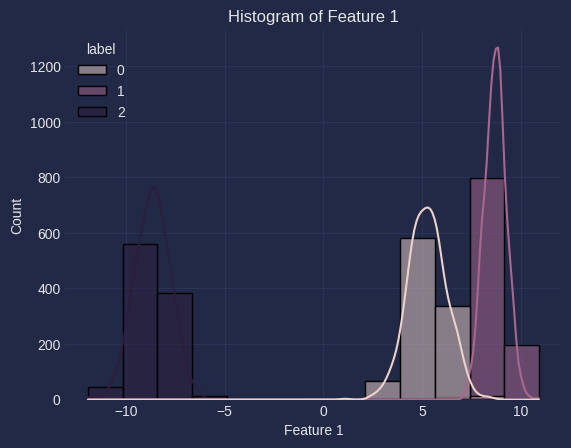

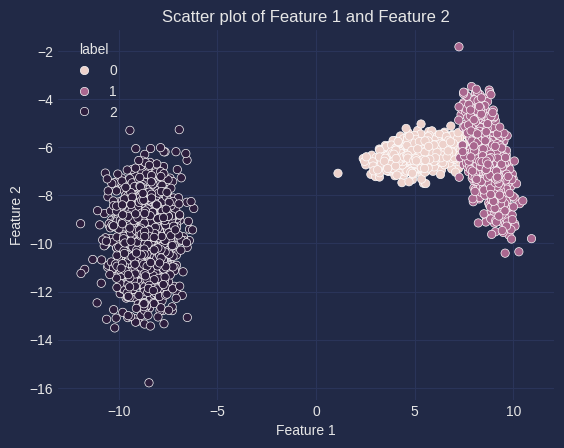

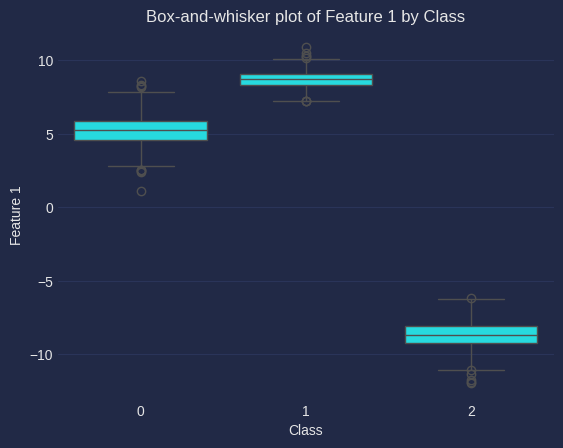

Statistical Summary of Feature 1:
        count      mean       std        min       25%       50%       75%  \
label                                                                        
0      1000.0  5.272514  0.980633   1.116503  4.614901  5.261767  5.905607   
1      1000.0  8.718045  0.551643   7.236448  8.348787  8.718669  9.074631   
2      1000.0 -8.666938  0.901905 -11.933177 -9.259058 -8.654689 -8.044398   

             max  
label             
0       8.590985  
1      10.927864  
2      -6.194897  
Shapiro-Wilk test for Feature 1 in Class 0: p-value = 0.28793683648109436
Shapiro-Wilk test for Feature 1 in Class 1: p-value = 0.3558558225631714
Shapiro-Wilk test for Feature 1 in Class 2: p-value = 0.29834499955177307


In [ ]:
#Задание 2 Провести разведочный анализ данных (построить гистограммы распределения признаков в каждом классе, диаграммы рассеяния и box-and-whisker, оценить статистические характеристики выборки, соответствие распределения данных нормальному распределению и т.д.).
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import mplcyberpunk
plt.style.use("cyberpunk")

# Построение гистограммы распределения признаков для каждого класса
sns.histplot(data=df, x='feature1', hue='label', kde=True) #столбец, для которого будет построена гистограмма, то есть feature1. Параметр hue разделяет данные на группы в соответствии с метками классов, что позволяет построить отдельные гистограммы для каждого класса. Параметр kde=True включает оценку плотности ядра на гистограмме.
plt.title('Histogram of Feature 1')
plt.xlabel('Feature 1')
plt.ylabel('Count')
plt.show()

# Диаграмма рассеяния для признаков feature1 и feature2
sns.scatterplot(data=df, x='feature1', y='feature2', hue='label')
plt.title('Scatter plot of Feature 1 and Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Box-and-whisker plot для признака feature1 по классам
sns.boxplot(data=df, x='label', y='feature1')
plt.title('Box-and-whisker plot of Feature 1 by Class')
plt.xlabel('Class')
plt.ylabel('Feature 1')
plt.show()

# Оценка статистических характеристик выборки
print("Statistical Summary of Feature 1:")
print(df.groupby('label')['feature1'].describe()) #группировку данных по уникальным значениям в столбце 'label',после группировки выбирается столбец 'feature1', для которого будут вычислены статистические характеристики.

# Анализ соответствия распределения данных нормальному распределению
for label in df['label'].unique():# цикл проходится по каждому уникальному значению из столбца 'label'
    subset = df[df['label'] == label]['feature1'] #условие фильтрации, которое возвращает логический массив, указывающий на строки в датафрейме, где значение в столбце 'label' равно текущему значению label.
    print(f"Shapiro-Wilk test for Feature 1 in Class {label}: p-value = {stats.shapiro(subset)[1]}")

In [ ]:
# Применение теста Шапиро-Уилка к выборке
from scipy.stats import shapiro
stat, p = shapiro(df['feature1'])

# Вывод результатов теста
print('Statistic:', stat)
print('p-value:', p)

# Оценка нулевой гипотезы
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistic: 0.7722487449645996
p-value: 0.0
Sample does not look Gaussian (reject H0)


In [ ]:
#При необходимости провести предобработку реальных данных (устранить дубликаты и выбросы, восстановить пропущенные значения, удалить неинформативные признаки и т.д.).
#Задание 3
df.drop_duplicates(inplace=True) #удаление дубликатов из датафрейма df

In [ ]:
# Заполнение пропущенных значений средними
df.fillna(df.mean(), inplace=True) #заменяет все пропущенные значения в датафрейме df средними значениями по столбцам

# Интерполяция для восстановления пропущенных значений
df.interpolate(method='linear', inplace=True)#заполняет пропущенные значения на основе имеющихся данных, используя линейную интерполяцию

In [ ]:
print(df.columns)

Index(['feature1', 'feature2', 'label'], dtype='object')


In [ ]:
# Удаление неинформативных признаков-
if 'non_informative_feature1' in df.columns and 'non_informative_feature2' in df.columns:
    df.drop(columns=['non_informative_feature1', 'non_informative_feature2'], inplace=True)#Если оба признака присутствуют в датафрейме, то они удаляются
else:#Если хотя бы один из признаков отсутствует в датафрейме, выводится сообщение о том, что один или оба неинформативных признака отсутствуют в датасете.
    print("Одного или обоих неинформативных признаков нет в датасете.")


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #используется для стандартизации признаков путем удаления среднего значения и масштабирования до единичной дисперсии.
df[['feature1', 'feature2']] = scaler.fit_transform(df[['feature1', 'feature2']])


In [ ]:
#Задание 4-	Разбить данные на обучающую и тестовую выборки (при holdout кросс-валидации).
from sklearn.model_selection import train_test_split

# Разбиение данных на признаки (X) и целевую переменную (y)
X = df.drop('label', axis=1)
y = df['label']

# Разбиение данных на обучающую и тестовую выборки (например, 80% - обучающая выборка, 20% - тестовая выборка)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка размерности полученных выборок
print("Размерность обучающей выборки X_train:", X_train.shape)
print("Размерность тестовой выборки X_test:", X_test.shape)
print("Размерность обучающей выборки y_train:", y_train.shape)
print("Размерность тестовой выборки y_test:", y_test.shape)


Размерность обучающей выборки X_train: (2400, 2)
Размерность тестовой выборки X_test: (600, 2)
Размерность обучающей выборки y_train: (2400,)
Размерность тестовой выборки y_test: (600,)


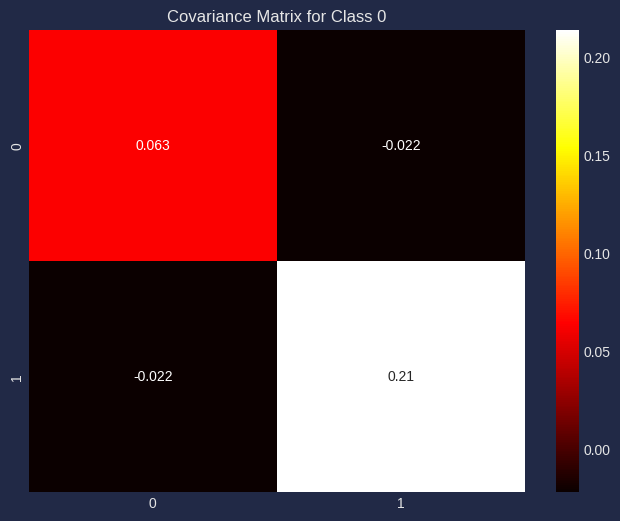

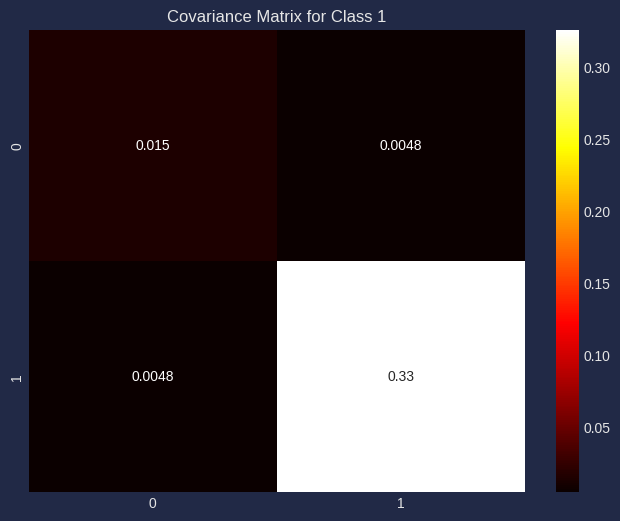

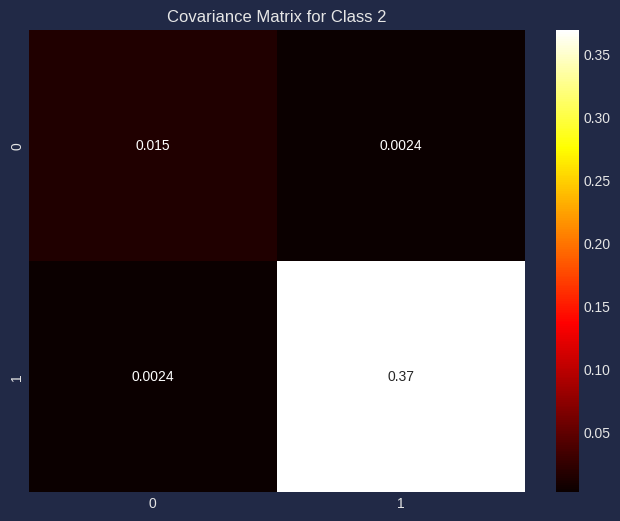

In [ ]:
#5.1
'''	Оценить ковариационные матрицы обучающих данных для каждого класса при различных предположениях:
а) ковариационные матрицы всех классов равные, скалярные;
б) равные, диагональные;
в) различные, скалярные;
г) различные, диагональные;
д) равные;
е) различные. Визуализировать ковариационные матрицы для каждого случая.'''
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.mixture import GaussianMixture

# Определение количества классов на основе меток обучающей выборки
n_classes = len(np.unique(y_train))

# Создание и обучение модели GaussianMixture на обучающих данных
gmm = GaussianMixture(n_components=n_classes)
gmm.fit(X_train)

# Получение ковариационных матриц для каждого класса
covariances = gmm.covariances_

# Визуализация ковариационных матриц
for i in range(n_classes):
    # Преобразование ковариационной матрицы в DataFrame
    df_cov = pd.DataFrame(covariances[i])

    # Создание тепловой карты с аннотациями
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cov, cmap='hot', annot=True)
    plt.title(f'Covariance Matrix for Class {i}')
    plt.show()





In [ ]:
#5.2-	Рассчитать классификационные очки обученных байесовских классификаторов (при предположениях а)–е) для примеров обучающей и тестовой выборок.
from sklearn.naive_bayes import GaussianNB

# Создание и обучение GaussianNB с разными предположениями о ковариационной матрице
gnb = GaussianNB(var_smoothing=1e-9)  # Предположение а) равные скалярные ковариационные матрицы
gnb.fit(X_train, y_train)

# Получение вероятностей принадлежности примеров к каждому классу для обучающей и тестовой выборок
train_proba = gnb.predict_proba(X_train)
test_proba = gnb.predict_proba(X_test)


In [ ]:
#5.3-В исходном пространстве признаков (либо в нескольких проекциях) изобразить области классов (закрасить разными цветами), формируемые каждым из обученных классификаторов.
#Нанести на диаграммы границы классов и данные из обучающей и тестовой выборок. На отдельной диаграмме изобразить все границы классов, формируемые построенными классификаторами.
# Генерация данных
num_samples_per_class = 1000
num_classes = 3

# Создание случайных средних для каждого класса
means = np.random.randn(num_classes, 2) * 10

# Создание случайных ковариационных матриц для каждого класса
covs = [np.random.randn(2, 2) for _ in range(num_classes)]

# Генерация данных для каждого класса
data = []
labels = []
for i in range(num_classes):
    samples = np.random.multivariate_normal(means[i], covs[i], num_samples_per_class)
    data.append(samples)
    labels.extend([i] * num_samples_per_class)

# Преобразование данных в формат DataFrame
data = np.concatenate(data)
df = pd.DataFrame(data, columns=['feature1', 'feature2'])
df['label'] = labels

# Разделение данных на признаки и метки классов
X = df[['feature1', 'feature2']].values
y = df['label'].values

# Разбиение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Вывод первых нескольких строк датасета
print(df.head())




    feature1   feature2  label
0  13.918573  15.823174      0
1  15.567526  14.961747      0
2  16.131874  15.119187      0
3  15.625388  14.761801      0
4  14.891900  16.813737      0


<ipython-input-15-43a24b3db4c1>:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(means[i], covs[i], num_samples_per_class)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Обучение классификаторов
model1 = GaussianNB()
model1.fit(X_train, y_train)

model2 = SVC(kernel='linear', C=1.0, random_state=42)
model2.fit(X_train, y_train)

# Визуализация областей классов и границ классов
plt.figure(figsize=(14, 6))

# Отображение областей классов для модели 1 (наивный байесовский классификатор)
plt.subplot(1, 2, 1)
plot_decision_regions(X_train, y_train, clf=model1, legend=2)
plt.title('Decision Regions - Model 1 (Naive Bayes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Отображение областей классов для модели 2 (метод опорных векторов)
plt.subplot(1, 2, 2)
plot_decision_regions(X_train, y_train, clf=model2, legend=2)
plt.title('Decision Regions - Model 2 (SVM)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


<ipython-input-17-d47cf6616104>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', marker='x', label='Test Data')


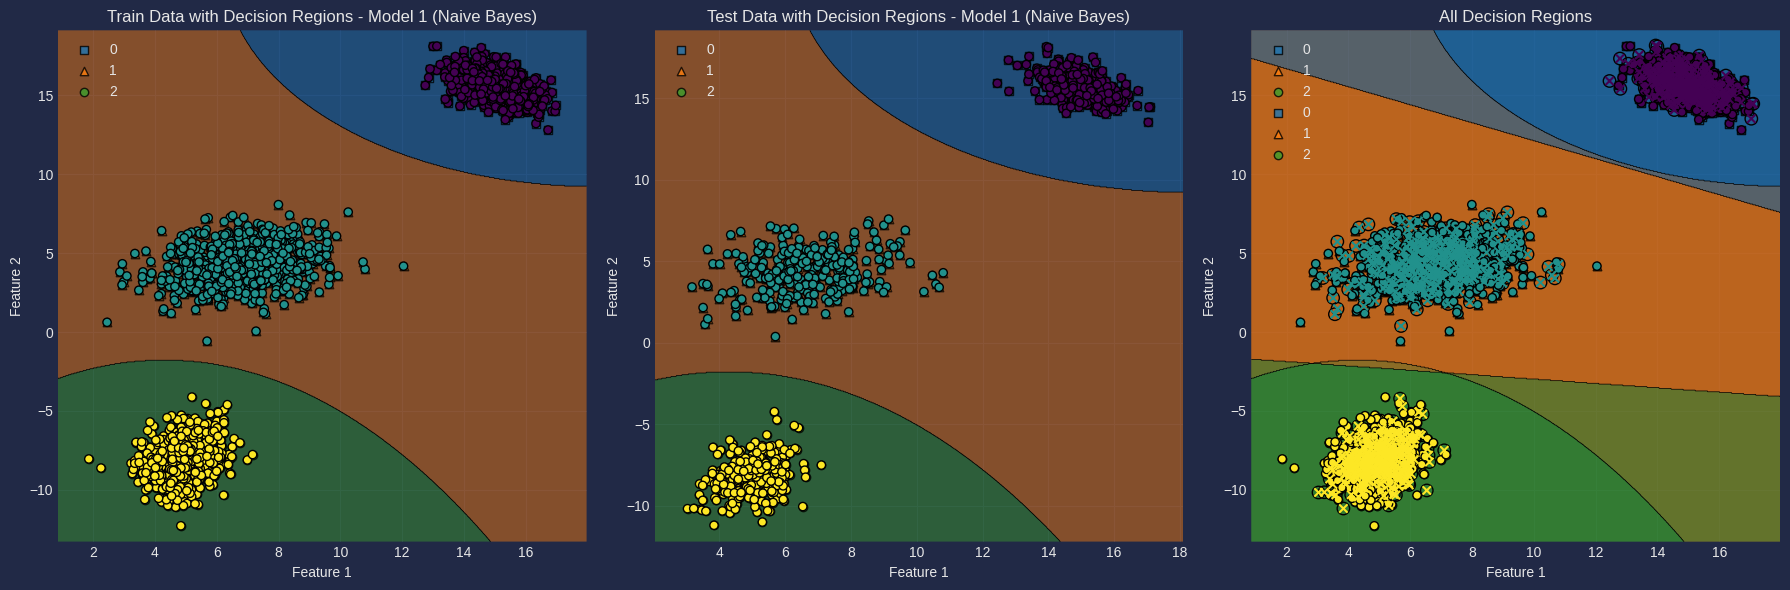

In [ ]:
plt.figure(figsize=(18, 6))

# Визуализация данных из обучающей выборки
plt.subplot(1, 3, 1)
plot_decision_regions(X_train, y_train, clf=model1, legend=2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', label='Train Data')
plt.title('Train Data with Decision Regions - Model 1 (Naive Bayes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Визуализация данных из тестовой выборки
plt.subplot(1, 3, 2)
plot_decision_regions(X_test, y_test, clf=model1, legend=2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', label='Test Data')
plt.title('Test Data with Decision Regions - Model 1 (Naive Bayes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Визуализация всех границ классов
plt.subplot(1, 3, 3)
plot_decision_regions(X_train, y_train, clf=model1, legend=2)
plot_decision_regions(X_train, y_train, clf=model2, legend=2, X_highlight=X_test)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', marker='x', label='Test Data')
plt.title('All Decision Regions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


In [ ]:
#6
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Генерация данных
num_samples_per_class = 1000
num_classes = 3
means = np.random.randn(num_classes, 2) * 10
covs = [np.random.randn(2, 2) for _ in range(num_classes)]

data = []
labels = []
for i in range(num_classes):
    samples = np.random.multivariate_normal(means[i], covs[i], num_samples_per_class)
    data.append(samples)
    labels.extend([i] * num_samples_per_class)

data = np.concatenate(data)
df = pd.DataFrame(data, columns=['feature1', 'feature2'])
df['label'] = labels

# Разделение данных на признаки и метки классов
X = df[['feature1', 'feature2']]
y = df['label']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение классификаторов
classifiers = [GaussianNB() for _ in range(5)]
for clf in classifiers:
    clf.fit(X_train, y_train)

# Оценка точности на обучающей и тестовой выборках
train_accuracies = []
test_accuracies = []

for clf in classifiers:
    # Для обучающей выборки
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Для тестовой выборки
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Вывод результатов
for i, clf in enumerate(classifiers):
    print(f"Classifier {i+1}:")
    print(f"  Train Accuracy: {train_accuracies[i]}")
    print(f"  Test Accuracy: {test_accuracies[i]}")
    print()


<ipython-input-22-337fc44e31d1>:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(means[i], covs[i], num_samples_per_class)


Classifier 1:
  Train Accuracy: 0.9995833333333334
  Test Accuracy: 1.0

Classifier 2:
  Train Accuracy: 0.9995833333333334
  Test Accuracy: 1.0

Classifier 3:
  Train Accuracy: 0.9995833333333334
  Test Accuracy: 1.0

Classifier 4:
  Train Accuracy: 0.9995833333333334
  Test Accuracy: 1.0

Classifier 5:
  Train Accuracy: 0.9995833333333334
  Test Accuracy: 1.0



In [ ]:
#7
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Генерация данных
num_samples_per_class = 1000
num_classes = 3
means = np.random.randn(num_classes, 2) * 10
covs = [np.random.randn(2, 2) for _ in range(num_classes)]

data = []
labels = []
for i in range(num_classes):
    samples = np.random.multivariate_normal(means[i], covs[i], num_samples_per_class)
    data.append(samples)
    labels.extend([i] * num_samples_per_class)

data = np.concatenate(data)
df = pd.DataFrame(data, columns=['feature1', 'feature2'])
df['label'] = labels

# Разделение данных на признаки и метки классов
X = df[['feature1', 'feature2']]
y = df['label']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение классификаторов
classifiers = [GaussianNB() for _ in range(5)]
for clf in classifiers:
    clf.fit(X_train, y_train)

# Инициализация списков для хранения результатов
train_roc_auc_micro = []
test_roc_auc_micro = []
train_roc_auc_macro = []
test_roc_auc_macro = []
train_pr_auc_micro = []
test_pr_auc_micro = []
train_pr_auc_macro = []
test_pr_auc_macro = []

# Для каждого классификатора
for clf in classifiers:
    # Получение вероятностей принадлежности к классу для обучающей и тестовой выборок
    y_train_proba = clf.predict_proba(X_train)
    y_test_proba = clf.predict_proba(X_test)

    # ROC-кривая и PR-кривая для обучающей выборки
    fpr_train_micro, tpr_train_micro, _ = roc_curve(pd.get_dummies(y_train).values.ravel(), y_train_proba.ravel())
    precision_train_micro, recall_train_micro, _ = precision_recall_curve(pd.get_dummies(y_train).values.ravel(), y_train_proba.ravel())

    # ROC AUC и PR AUC для обучающей выборки
    train_roc_auc_micro.append(roc_auc_score(pd.get_dummies(y_train), y_train_proba, average='micro'))
    train_roc_auc_macro.append(roc_auc_score(pd.get_dummies(y_train), y_train_proba, average='macro'))
    train_pr_auc_micro.append(auc(recall_train_micro, precision_train_micro))

    # ROC-кривая и PR-кривая для тестовой выборки
    fpr_test_micro, tpr_test_micro, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_test_proba.ravel())
    precision_test_micro, recall_test_micro, _ = precision_recall_curve(pd.get_dummies(y_test).values.ravel(), y_test_proba.ravel())

    # ROC AUC и PR AUC для тестовой выборки
    test_roc_auc_micro.append(roc_auc_score(pd.get_dummies(y_test), y_test_proba, average='micro'))
    test_roc_auc_macro.append(roc_auc_score(pd.get_dummies(y_test), y_test_proba, average='macro'))
    test_pr_auc_micro.append(auc(recall_test_micro, precision_test_micro))

# Вывод результатов
for i, clf in enumerate(classifiers):
    print(f"Classifier {i+1}:")
    print(f"  Train Micro-averaged ROC AUC: {train_roc_auc_micro[i]}")
    print(f"  Test Micro-averaged ROC AUC: {test_roc_auc_micro[i]}")
    print(f"  Train Macro-averaged ROC AUC: {train_roc_auc_macro[i]}")
    print(f"  Test Macro-averaged ROC AUC: {test_roc_auc_macro[i]}")
    print(f"  Train Micro-averaged PR AUC: {train_pr_auc_micro[i]}")
    print(f"  Test Micro-averaged PR AUC: {test_pr_auc_micro[i]}")
    print()






<ipython-input-23-7058e300b33a>:18: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(means[i], covs[i], num_samples_per_class)


Classifier 1:
  Train Micro-averaged ROC AUC: 1.0
  Test Micro-averaged ROC AUC: 1.0
  Train Macro-averaged ROC AUC: 1.0
  Test Macro-averaged ROC AUC: 1.0
  Train Micro-averaged PR AUC: 1.0
  Test Micro-averaged PR AUC: 1.0

Classifier 2:
  Train Micro-averaged ROC AUC: 1.0
  Test Micro-averaged ROC AUC: 1.0
  Train Macro-averaged ROC AUC: 1.0
  Test Macro-averaged ROC AUC: 1.0
  Train Micro-averaged PR AUC: 1.0
  Test Micro-averaged PR AUC: 1.0

Classifier 3:
  Train Micro-averaged ROC AUC: 1.0
  Test Micro-averaged ROC AUC: 1.0
  Train Macro-averaged ROC AUC: 1.0
  Test Macro-averaged ROC AUC: 1.0
  Train Micro-averaged PR AUC: 1.0
  Test Micro-averaged PR AUC: 1.0

Classifier 4:
  Train Micro-averaged ROC AUC: 1.0
  Test Micro-averaged ROC AUC: 1.0
  Train Macro-averaged ROC AUC: 1.0
  Test Macro-averaged ROC AUC: 1.0
  Train Micro-averaged PR AUC: 1.0
  Test Micro-averaged PR AUC: 1.0

Classifier 5:
  Train Micro-averaged ROC AUC: 1.0
  Test Micro-averaged ROC AUC: 1.0
  Train Mac

In [ ]:
#8
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, ShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Создание списка классификаторов
classifiers = [GaussianNB() for _ in range(5)]

# Создание размеченной выборки данных
X = df[['feature1', 'feature2']]
y = df['label']

# Создание различных способов кросс-валидации
cv_strategies = {
    'KFold': KFold(n_splits=5, shuffle=True, random_state=42),
    'StratifiedKFold': StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    'ShuffleSplit': ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
}

# Исследование моделей
for i, clf in enumerate(classifiers, start=1):
    print(f"Classifier {i}:")
    for cv_name, cv_strategy in cv_strategies.items():
        train_scores = []
        test_scores = []
        for train_index, test_index in cv_strategy.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            clf.fit(X_train, y_train)
            train_pred = clf.predict(X_train)
            test_pred = clf.predict(X_test)
            train_scores.append(accuracy_score(y_train, train_pred))
            test_scores.append(accuracy_score(y_test, test_pred))
        print(f"  {cv_name}:")
        print(f"    Train Accuracy: {np.mean(train_scores)}")
        print(f"    Test Accuracy: {np.mean(test_scores)}")


Classifier 1:
  KFold:
    Train Accuracy: 1.0
    Test Accuracy: 1.0
  StratifiedKFold:
    Train Accuracy: 1.0
    Test Accuracy: 1.0
  ShuffleSplit:
    Train Accuracy: 1.0
    Test Accuracy: 1.0
Classifier 2:
  KFold:
    Train Accuracy: 1.0
    Test Accuracy: 1.0
  StratifiedKFold:
    Train Accuracy: 1.0
    Test Accuracy: 1.0
  ShuffleSplit:
    Train Accuracy: 1.0
    Test Accuracy: 1.0
Classifier 3:
  KFold:
    Train Accuracy: 1.0
    Test Accuracy: 1.0
  StratifiedKFold:
    Train Accuracy: 1.0
    Test Accuracy: 1.0
  ShuffleSplit:
    Train Accuracy: 1.0
    Test Accuracy: 1.0
Classifier 4:
  KFold:
    Train Accuracy: 1.0
    Test Accuracy: 1.0
  StratifiedKFold:
    Train Accuracy: 1.0
    Test Accuracy: 1.0
  ShuffleSplit:
    Train Accuracy: 1.0
    Test Accuracy: 1.0
Classifier 5:
  KFold:
    Train Accuracy: 1.0
    Test Accuracy: 1.0
  StratifiedKFold:
    Train Accuracy: 1.0
    Test Accuracy: 1.0
  ShuffleSplit:
    Train Accuracy: 1.0
    Test Accuracy: 1.0


In [ ]:
#10
from sklearn.linear_model import LogisticRegression

# Создание объекта модели логистической регрессии
log_reg = LogisticRegression()

# Обучение модели логистической регрессии на обучающих данных
log_reg.fit(X_train, y_train)

# Оценка точности модели логистической регрессии на тестовой выборке
test_accuracy_log_reg = log_reg.score(X_test, y_test)

# Вывод показателей точности для обеих моделей
print("Нормальный байесовский классификатор:")
print("Точность на тестовой выборке:", test_accuracy)
print("\nЛогистическая регрессия:")
print("Точность на тестовой выборке:", test_accuracy_log_reg)



Нормальный байесовский классификатор:
Точность на тестовой выборке: 1.0

Логистическая регрессия:
Точность на тестовой выборке: 1.0


In [ ]:
%autosave 60

Autosaving every 60 seconds
